# WORD CLOUDS
- dikenal sebagai text clouds atau tag clouds
- package word_could
- dengan packages ini kita bisa langsung mengimpor word_cloud yang dapat kita gunakan

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [2]:
from wordcloud import WordCloud, STOPWORDS
print('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [3]:
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt

In [4]:
alice_novel=open('alice_novel.txt', 'r').read()

In [5]:
stopwords = set(STOPWORDS)

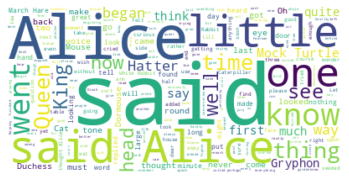

In [6]:
alice_wc= WordCloud(background_color='white', max_words=2000, stopwords=stopwords)
alice_wc.generate(alice_novel)

plt.imshow(alice_wc, interpolation ='bilinear')
plt.axis('off')
plt.show()

- mengatur ulang ukuran agar dapat memuat kata yang lebih banyak

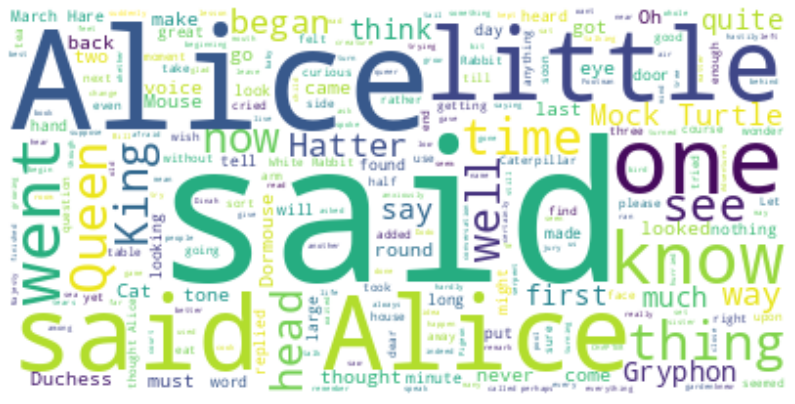

In [7]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(alice_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

- kita daoat mengubah kata yang lebih informatif lagi dengan mengubahnya dengan menambahkan ke stopwords yang kita miliki dan membuat ulang cloud

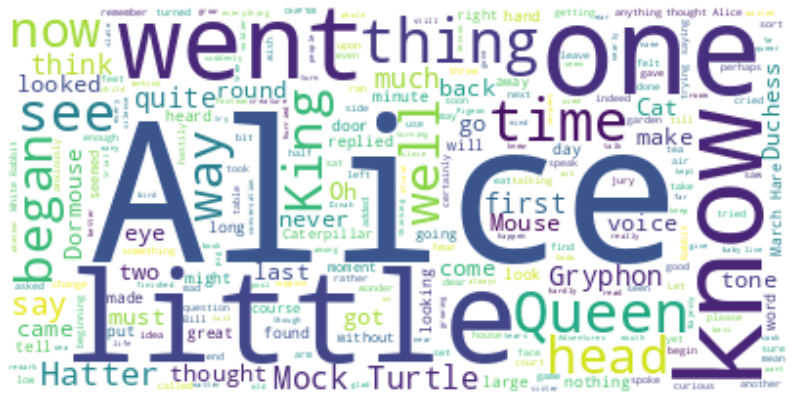

In [9]:
stopwords.add('said')
alice_wc.generate(alice_novel)
fig=plt.figure(14)
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

- dapat menambah nilai estetika dari cloud ini dengan melapiskan kata - kata ke mask dalam bentuk apapun

In [10]:

!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_mask.png
alice_mask=np.array(Image.open('alice_mask.png'))

- melihat gambar yang ada

In [ ]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

- melapiskan kata - kata pada gambar yang sudah di download

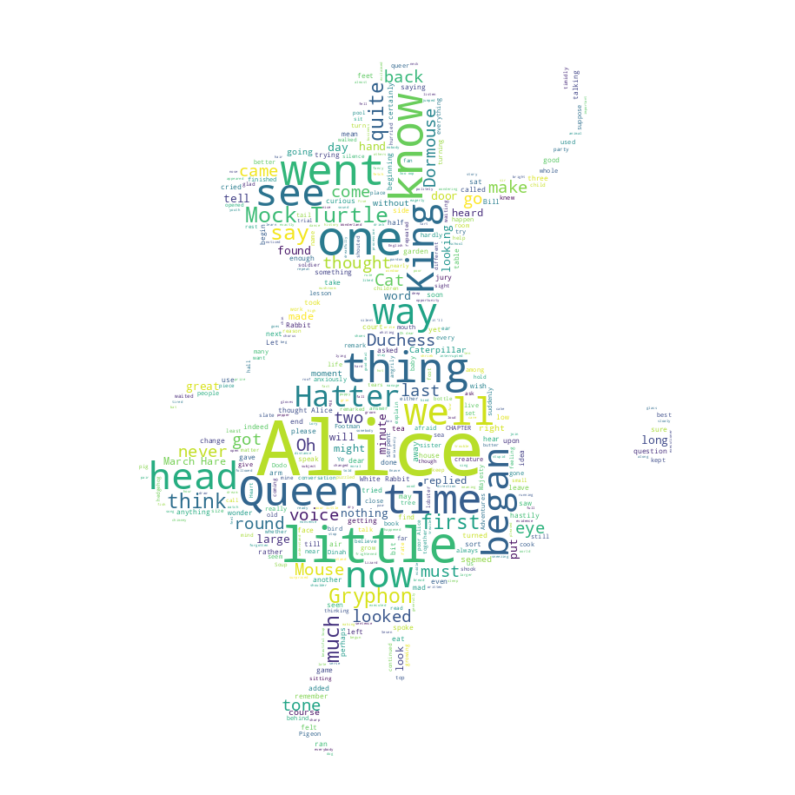

In [11]:
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)
alice_wc.generate(alice_novel)
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- dapat menggunakan data dari excell yang kebanyakan berisi banyak angka daripada kata - kata

In [12]:
df_can= pd.read_excel('Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows = range(20),
    skipfooter=2)
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis = 1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continrnt', 'RegName': 'Region'}, inplace=True)
df_can.columns=list(map(str, df_can.columns))
df_can.set_index('Country', inplace=True)
df_can['Total']=df_can.sum(axis=1)
years=list(map(str, range(1980,2014)))

/tmp/ipykernel_27569/1919407535.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total']=df_can.sum(axis=1)


In [13]:
df_can.head()

,Continrnt,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [14]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

In [17]:
max_words = 90
word_string = ' '
for country in df_can.index.values:
    if len(country.split(' '))== 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string=word_string+((country+ ' ')*repeat_num_times)
word_string

' China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [24]:
wordcloud= WordCloud(background_color='white').generate(word_string)
print('Word Cloud Created!')

Word Cloud Created!


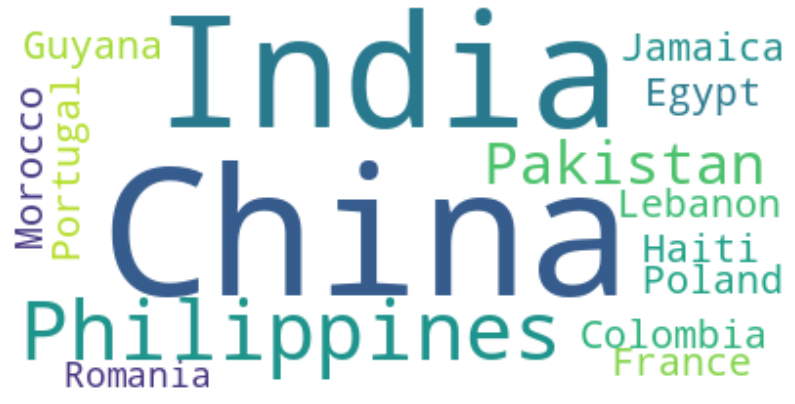

In [25]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()